In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, metrics

In [63]:
dataset = pd.read_csv('/home/aayush/task3_midas/datasets/imbalanced_dataset_200.csv')
train, test = model_selection.train_test_split(dataset, test_size=0.3)
x_train = train["pre_processed_text"].values
x_test = test["pre_processed_text"].values
y_train = train["category"].values
y_test = test["category"].values
print("our training set contains %d examples"%(len(x_train)))
print("our test set contains %d examples"%(len(x_test)))

our training set contains 11090 examples
our test set contains 4754 examples


Encoding Using CountVectorizer

In [72]:
encoder = preprocessing.LabelEncoder()
y_train_vec = encoder.fit_transform(y_train)
y_test_vec = encoder.fit_transform(y_test)
print(y_train_vec)
print(y_test_vec)

[14  9  9 ... 12  0 19]
[ 6  9  0 ...  3  9 19]


In [73]:
count_vect = feature_extraction.text.CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x_train)
x_train_vec =  count_vect.transform(x_train).todense()
x_test_vec =  count_vect.transform(x_test).todense()
print("size of vocab:",x_train_vec.shape[1])


size of vocab: 19608


Naive Bayes Classifier

In [74]:
naive_bayes = naive_bayes.MultinomialNB()
naive_bayes.fit(x_train_vec, y_train_vec)


MultinomialNB()

In [76]:
y_pred_vec = naive_bayes.predict(x_test_vec)
print(y_pred_vec)

[ 6  9  0 ...  3  9 19]


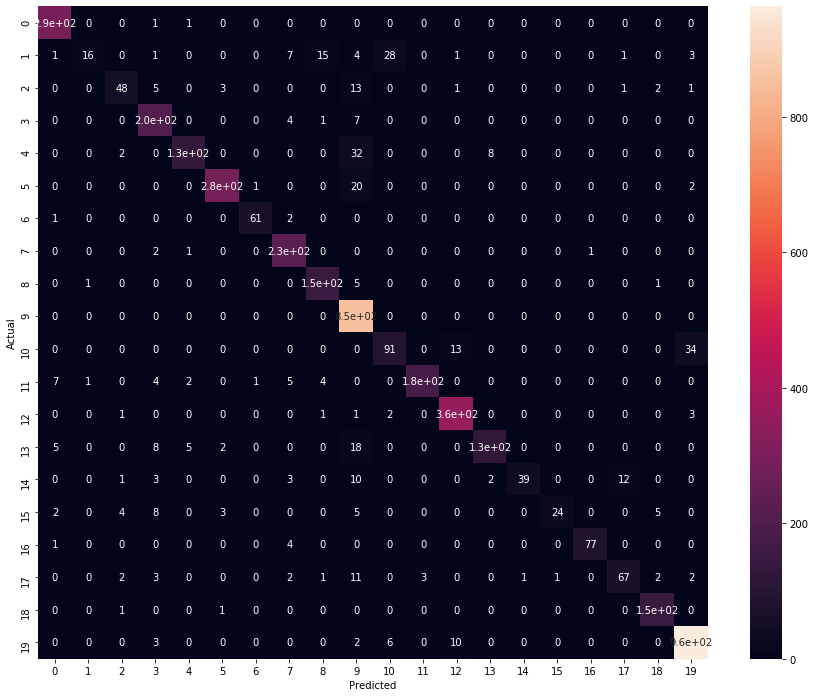

                        precision    recall  f1-score   support

            Automotive       0.94      0.99      0.97       293
              BabyCare       0.89      0.21      0.34        77
    Bags,Wallets&Belts       0.81      0.65      0.72        74
 BeautyandPersonalCare       0.84      0.94      0.89       217
             Computers       0.94      0.76      0.84       172
              Footwear       0.97      0.93      0.95       307
             Furniture       0.97      0.95      0.96        64
HomeDecor&FestiveNeeds       0.89      0.98      0.94       231
        HomeFurnishing       0.87      0.95      0.91       155
             Jewellery       0.87      1.00      0.93       853
         Kids'Clothing       0.72      0.66      0.69       138
        Kitchen&Dining       0.98      0.88      0.93       206
         Men'sClothing       0.94      0.98      0.96       371
   Mobiles&Accessories       0.93      0.77      0.84       165
       Pens&Stationery       0.97      

In [81]:
conf_mat = metrics.confusion_matrix(y_test_vec, y_pred_vec,normalize = None)
plt.figure(figsize = (15,12))
sns.heatmap(conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

target_strings = encoder.inverse_transform(np.arange(20))
print(metrics.classification_report(y_test_vec, y_pred_vec, target_names=target_strings))

In [32]:
MAX_LENGTH = 2000
